

## 📘 1. **Understanding Simple Linear Regression Equations**

---

### ✅ **Definition**:

Simple Linear Regression is a way to **predict a value (Y)** based on **one input (X)**.

### 🧠 **Equation**:

$$
\hat{Y} = mX + b
$$

Where:

* $\hat{Y}$ = predicted value
* $X$ = input feature (independent variable)
* $m$ = slope (how much Y changes for each change in X)
* $b$ = intercept (value of Y when X = 0)

### 🎯 **Goal**:

Find the **best line** (values of $m$ and $b$) that fits the data.

---

### 🧪 **Example**:

Imagine you're predicting a person's **salary (Y)** based on their **years of experience (X)**.

| Years of Experience (X) | Salary (Y) |
| ----------------------- | ---------- |
| 1                       | 40,000     |
| 2                       | 50,000     |
| 3                       | 60,000     |

Linear regression tries to fit a line like:

$$
\hat{Y} = 10,000 \cdot X + 30,000
$$

So:

* For X = 1 → $\hat{Y} = 40,000$
* For X = 2 → $\hat{Y} = 50,000$
* For X = 3 → $\hat{Y} = 60,000$

Perfect fit! (Usually, it's not this perfect in real life.)


Awesome! Let's start with a **simple Python implementation** of **Simple Linear Regression** using both:

1. **Manual calculation** (to understand the math)
2. **Using scikit-learn** (to see how it's done in practice)

---

## 🧮 1. Manual Linear Regression (using NumPy)

Let’s implement the equation:

$$
\hat{Y} = mX + b
$$

We’ll use a small dataset:

```python
import numpy as np
import matplotlib.pyplot as plt

# Sample data: Experience (X) vs Salary (Y)
X = np.array([1, 2, 3, 4, 5])
Y = np.array([40000, 50000, 60000, 70000, 80000])

# Step 1: Mean of X and Y
mean_X = np.mean(X)
mean_Y = np.mean(Y)

# Step 2: Calculate m and b
numerator = np.sum((X - mean_X) * (Y - mean_Y))
denominator = np.sum((X - mean_X)**2)
m = numerator / denominator
b = mean_Y - m * mean_X

print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")

# Step 3: Predict
Y_pred = m * X + b

# Plot
plt.scatter(X, Y, color='blue', label='Actual')
plt.plot(X, Y_pred, color='red', label='Predicted Line')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Simple Linear Regression")
plt.legend()
plt.grid(True)
plt.show()
```

🔍 **Explanation**:

* We compute the mean of X and Y
* Then apply the formula for slope `m` and intercept `b`
* Plot the original points and the predicted regression line

---

## ⚙️ 2. Using `scikit-learn` (Fast & Professional Way)

```python
from sklearn.linear_model import LinearRegression
import numpy as np

# Reshape X to be 2D for sklearn
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([40000, 50000, 60000, 70000, 80000])

# Model
model = LinearRegression()
model.fit(X, Y)

# Results
print("Slope (m):", model.coef_[0])
print("Intercept (b):", model.intercept_)

# Predict
Y_pred = model.predict(X)

# Plot
import matplotlib.pyplot as plt

plt.scatter(X, Y, color='blue', label='Actual')
plt.plot(X, Y_pred, color='red', label='Predicted Line')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Simple Linear Regression with sklearn")
plt.legend()
plt.grid(True)
plt.show()
```

---

Let me know if you want:

* A small **coding exercise**
* To move on to **Topic 2: Cost Function**
* Or explanation of **how sklearn computes the line** behind the scenes


## Simple Linear Regression Practical

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv('weight_height.csv')
df.head()

,Height,Weight
0,187.571423,109.720985
1,174.706036,73.622732
2,188.239668,96.497550
3,182.196685,99.809504
4,177.499761,93.598619


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  29 non-null     float64
 1   Weight  29 non-null     float64
dtypes: float64(2)
memory usage: 596.0 bytes


In [73]:
df.describe()

,Height,Weight
count,29.000000,29.000000
mean,175.611750,84.512815
std,7.320871,10.380881
min,161.179495,67.663936
25%,171.819874,78.102614
50%,174.714106,83.658320
75%,180.836271,89.689391
max,191.023173,109.720985


Text(0, 0.5, 'Heights')

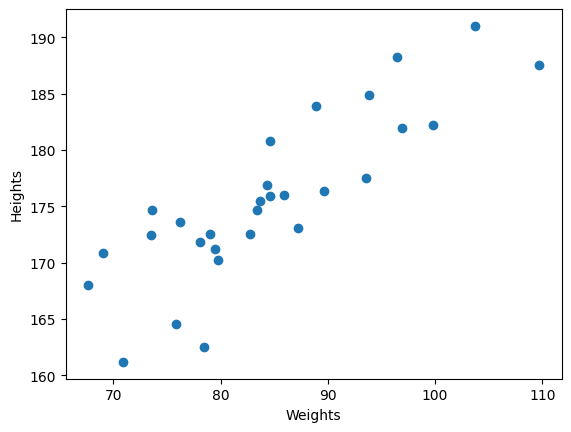

In [74]:
# scatter plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weights")
plt.ylabel("Heights")

In [75]:
# Correlation
df.corr()

,Height,Weight
Height,1.000000,0.845438
Weight,0.845438,1.000000


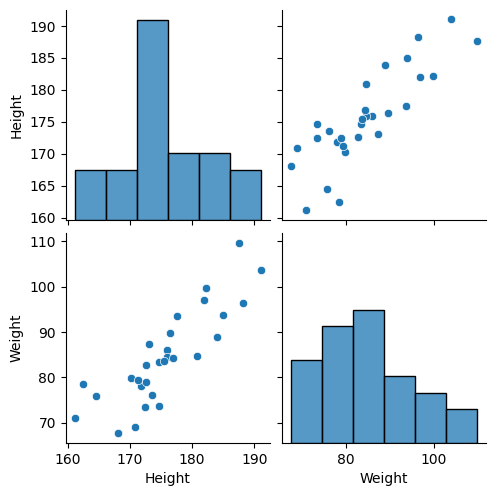

In [76]:
import seaborn as sns
sns.pairplot(df)

In [77]:
# Independent and dependent features
X=df[['Weight']] # this should be in 2d
y=df["Height"] # this variable may in series or 1d 

In [78]:
# Train Test split
from  sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.25, random_state=42)

In [79]:
# Standarization
from sklearn.preprocessing import StandardScaler

In [80]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [81]:
X_test = scaler.transform(X_test)

In [82]:
# Apply simple linear regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [83]:
print("Coefficient:",regression.coef_)
print("Intercept: ",regression.intercept_)

Coefficient: [4.91806718]
Intercept:  176.0001708423865


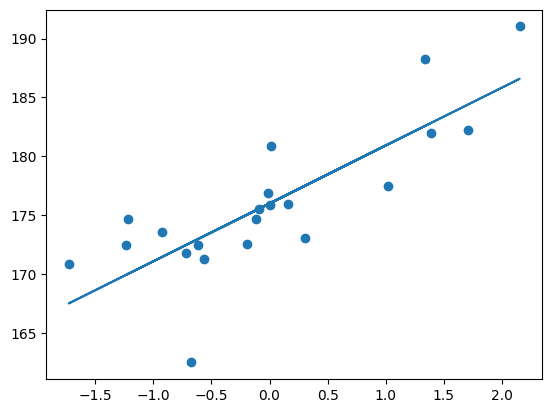

In [84]:
# plot Training data plot 
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

In [85]:
# prdiction for test data
y_pred = regression.predict(X_test)

In [86]:
# performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("mse: ", mse)
print("mae: ", mae)
print("rmse: ", rmse)

mse:  20.930705617006126
mae:  4.077359470182095
rmse:  4.575008810593278


In [87]:
# R^2 = 1-SSR/SSt
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score


0.7639919029506708

In [88]:
# Adjusted R^2 = 1-[(1-r2)*(n-1)/(n-k-1)]
1-(1-score)*(len(y_test)/(len(y_test)-X_test.shape[1]-1))

0.6853225372675611

In [89]:
# for new input
regression.predict(scaler.transform([[72]]))

d:\data-science-bootcamp\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([169.13292823])

In [90]:
import pandas as pd

# Replace 'Weight' with the actual column name you used when fitting the scaler
new_input = pd.DataFrame([[73]], columns=['Weight'])

# Transform and predict
scaled_input = scaler.transform(new_input)
prediction = regression.predict(scaled_input)

print(prediction)


[169.68227574]
